In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score

def get_metrics(y_true, y_pred):
    # tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # 明确指定labels参数
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

    # 现在cm是一个2x2矩阵，即使数据只包含一个类别
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, y_pred)
    
    return accuracy, sensitivity, specificity, f1


"""
For each model, I have trained 5 times to find the best result 

description: this function is to find for each Hb type, which number of time is the best result

output: 
    num_best_indicator: the best accuracy for each Hb type
    num_best_acc: the best number of time for each Hb type
"""
def find_best_acc_index(result):
    num_best_indicator = {}
    num_best_acc = {}

    num_best_indicator['HbO'] = 0 
    num_best_indicator['HbR'] = 0 
    num_best_indicator['HbO+HbR'] = 0 

    num_best_acc['HbO'] = 0 
    num_best_acc['HbR'] = 0 
    num_best_acc['HbO+HbR'] = 0 
    for num_time, xres in result.items():
        res = xres['HB_TYPE_y_pred_and_y_test']
        for name, value in res.items():
            value = np.array(value)
            y_pred = value[:, 0, 0]
            y_test = value[:, 1, 0]
            accuracy, sensitivity, specificity, f1 = get_metrics(y_test, y_pred)
            if accuracy > num_best_indicator[name]:
                num_best_indicator[name] = accuracy
                num_best_acc[name] = num_time
    return num_best_indicator, num_best_acc
#         print(f'{machine_learning_name} | {name} | num:{num_time}, acc: {accuracy:.4f}, sen: {sensitivity:.4f}, spe: {specificity:.4f}, f1: {f1:.4f}')
        
# print(num_best_indicator)
# print(num_best_acc)

"""Show the best number result for each Hb type

Input:  
    - ML_MODEL_RES: 
        - the result of each model
        - ML_MODEL_result.npy file
    - num_best_acc:
        - the best number of time for each Hb type (Use find_best_acc_index function to get)

Output: 
    {
        'HbO': [accuracy, sensitivity, specificity, f1],
        'HbR': [accuracy, sensitivity, specificity, f1],
        'HbO+HbR': [accuracy, sensitivity, specificity, f1]
    }
        
"""
def show_best_num_res(ML_MODEL_RES, num_best_acc, machine_learning_name):
    HB_RES = {}
    for name, time in num_best_acc.items():
        res = ML_MODEL_RES[time]['HB_TYPE_y_pred_and_y_test'][name]
        res = np.array(res)
        y_pred = res[:, 0, 0]
        y_test = res[:, 1, 0]
        accuracy, sensitivity, specificity, f1 = get_metrics(y_test, y_pred)
        print(f'{machine_learning_name} | {name} | num:{time}, acc: {accuracy:.4f}, sen: {sensitivity:.4f}, spe: {specificity:.4f}, f1: {f1:.4f}')
        HB_RES[name] = [accuracy, sensitivity, specificity, f1]
    return HB_RES

Decision Tree | HbO | num:0, acc: 0.8615, sen: 0.6667, spe: 0.9200, f1: 0.6897
Decision Tree | HbR | num:0, acc: 0.6615, sen: 0.1333, spe: 0.8200, f1: 0.1538
Decision Tree | HbO+HbR | num:2, acc: 0.8769, sen: 0.7333, spe: 0.9200, f1: 0.7333
Random Forest | HbO | num:1, acc: 0.8000, sen: 0.2667, spe: 0.9600, f1: 0.3810
Random Forest | HbR | num:4, acc: 0.7692, sen: 0.0000, spe: 1.0000, f1: 0.0000
Random Forest | HbO+HbR | num:4, acc: 0.7692, sen: 0.1333, spe: 0.9600, f1: 0.2105
KNN | HbO | num:0, acc: 0.7846, sen: 0.1333, spe: 0.9800, f1: 0.2222
KNN | HbR | num:0, acc: 0.6923, sen: 0.0667, spe: 0.8800, f1: 0.0909
KNN | HbO+HbR | num:0, acc: 0.7538, sen: 0.0000, spe: 0.9800, f1: 0.0000
SVM | HbO | num:0, acc: 0.7692, sen: 0.0000, spe: 1.0000, f1: 0.0000
SVM | HbR | num:0, acc: 0.7692, sen: 0.0000, spe: 1.0000, f1: 0.0000
SVM | HbO+HbR | num:0, acc: 0.7692, sen: 0.0000, spe: 1.0000, f1: 0.0000


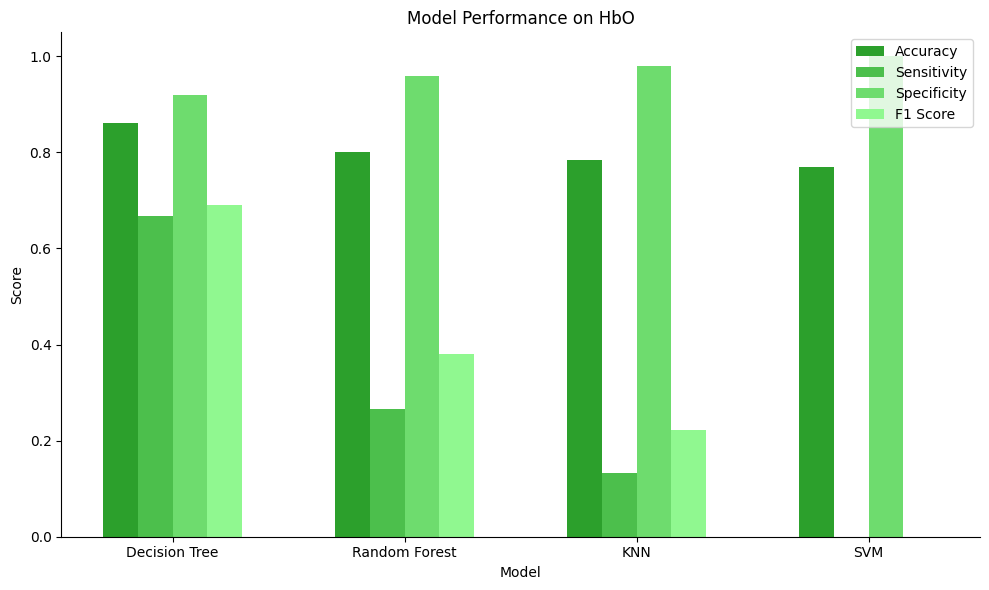

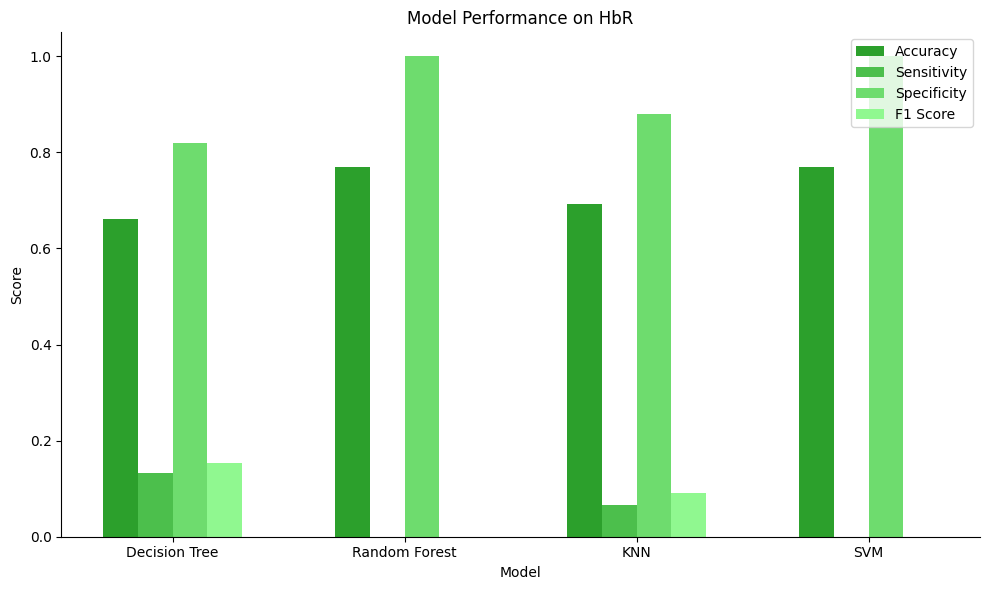

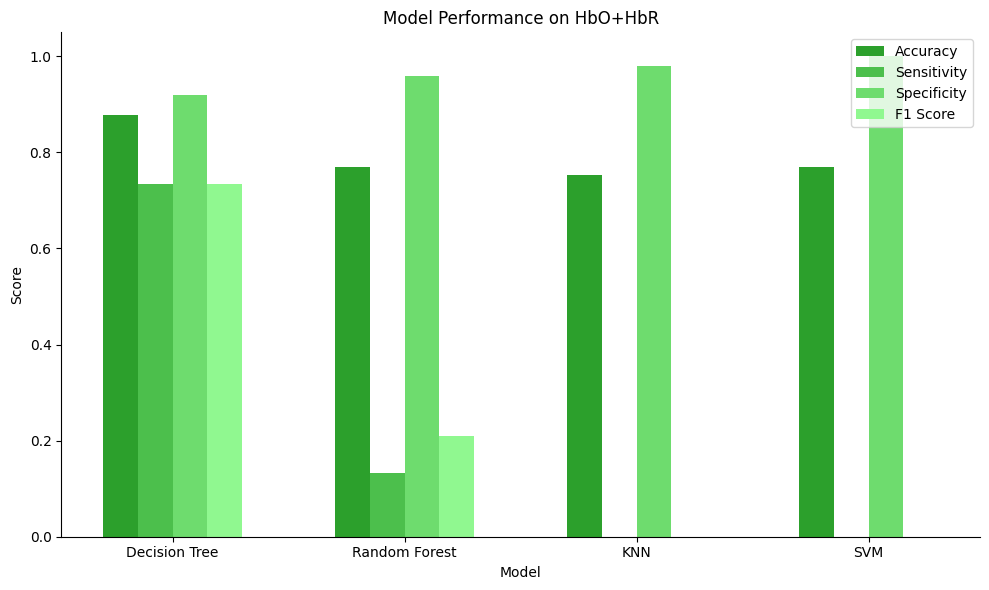

In [88]:

data = {}
for machine_learning_name in ['Decision Tree', 'Random Forest', 'KNN', 'SVM']:

    data_path = f'/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/results/ML_results/pre_treatment_hamd_reduction_50/{machine_learning_name}_result.npy'
    result = np.load(data_path, allow_pickle=True).item()

    num_best_indicator, num_best_acc = find_best_acc_index(result)
    data[machine_learning_name] = show_best_num_res(result, num_best_acc, machine_learning_name)
    
    
# Separate the data based on biomarkers
biomarkers = ['HbO', 'HbR', 'HbO+HbR']
# Define the data
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVM']
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'F1 Score']

# Define colors for each metric for better visualization
colors = ['#2ca02c', '#4cbf4c', '#6edc6e', '#90f890']  # A green gradient palette
# colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e41a1c']
plt.rcParams['font.family'] = 'DejaVu Sans'
# Create separate plots for each biomarker with different colors for each metric
for biomarker in biomarkers:
    # Extract data for the current biomarker
    model_data = [data[model][biomarker] for model in models]
    
    # Create a figure for the current biomarker
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(models))
    bar_width = 0.15  # Adjust bar width for clarity
    
    # Plot data for each model with different colors for each metric
    for metric_index, metric in enumerate(metrics):
        metric_scores = [model[metric_index] for model in model_data]
        ax.bar(index + metric_index * bar_width, metric_scores, bar_width, color=colors[metric_index], label=metric)
    
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_title(f'Model Performance on {biomarker}')
    ax.set_xticks(index + bar_width * 1.5)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1.05)
    ax.legend(loc='upper right')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'./{biomarker}.png')
    plt.show()



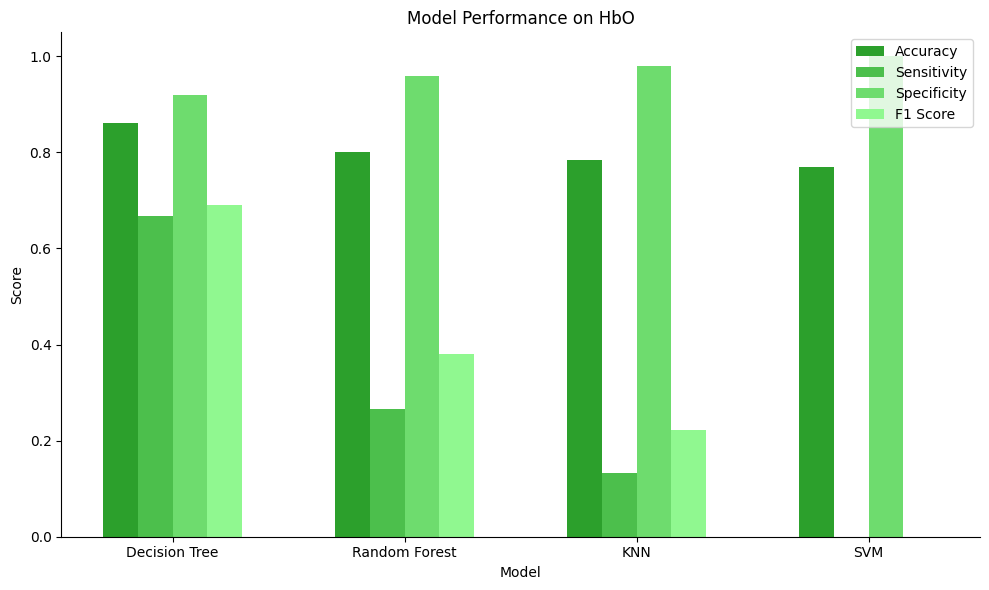

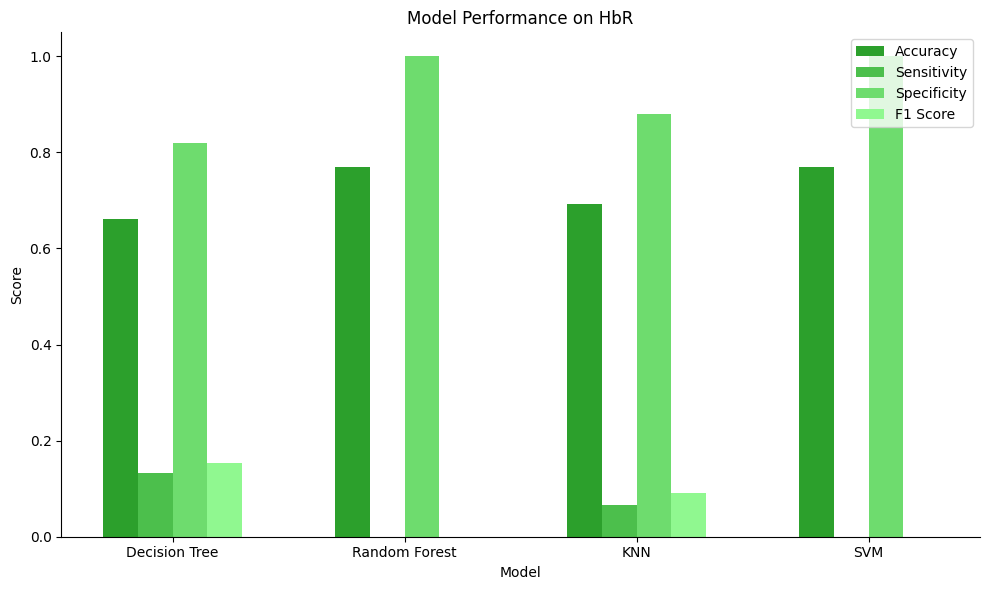

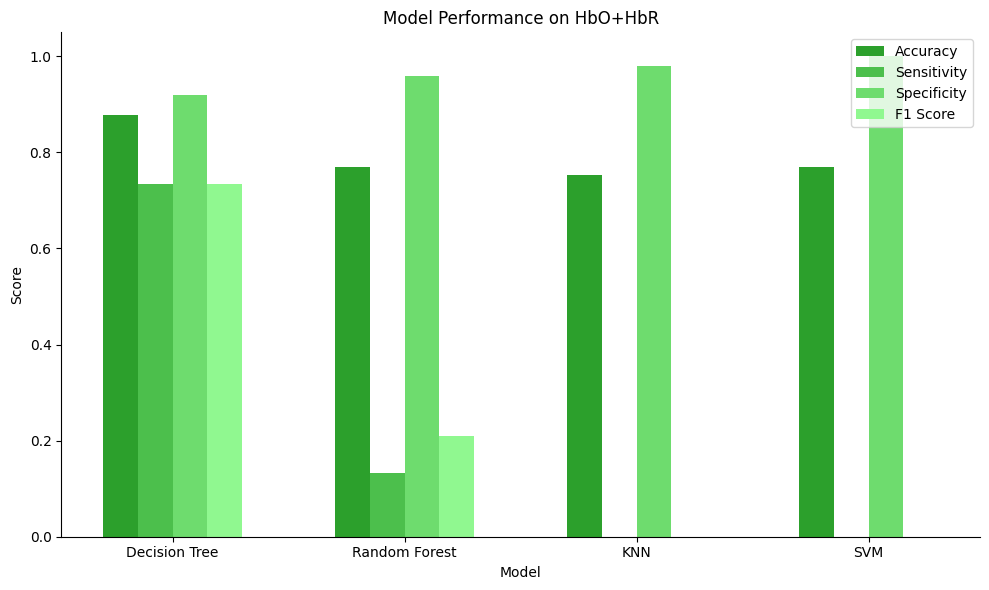

In [18]:
tmp = result['HbO_0']['model_y_pred_and_y_test']['KNN']
tmp = np.array(tmp)
print(tmp.shape)
y_pred = tmp[:, 0, 0]
y_test = tmp[:, 1, 0]

(65, 2, 1)
